In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#part1

In [3]:
import random
class kmc: #k means clustering hay
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X,cluster_group)
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)
    
    

In [4]:
#part2

In [5]:
data = pd.read_csv("credit_card.csv")

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
data

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.90               0.82      95.40              0.00   
1     C10002  3202.47               0.91       0.00              0.00   
2     C10003  2495.15               1.00     773.17            773.17   
3     C10004  1666.67               0.64    1499.00           1499.00   
4     C10005   817.71               1.00      16.00             16.00   
5     C10006  1809.83               1.00    1333.28              0.00   
6     C10007   627.26               1.00    7091.01           6402.63   
7     C10008  1823.65               1.00     436.20              0.00   
8     C10009  1014.93               1.00     861.49            661.49   
9     C10010   152.23               0.55    1281.60           1281.60   
10    C10011  1293.12               1.00     920.12              0.00   
11    C10012   630.79               0.82    1492.18           1492.18   
12    C10013  1516.93               1.00    3217.99           2500.23   
13    C10014   921.69               1.00    2137.93            419.96   
14    C10015  2772.77               1.00       0.00              0.00   
15    C10016  6886.21               1.00    1611.70              0.00   
16    C10017  2072.07               0.88       0.00              0.00   
17    C10018    41.09               0.45     519.00              0.00   
18    C10019  1989.07               1.00     504.35            166.00   
19    C10020  3577.97               1.00     398.64              0.00   
20    C10021  2016.68               1.00     176.68              0.00   
21    C10022  6369.53               1.00    6359.95           5910.04   
22    C10023   132.34               0.64     815.90              0.00   
23    C10024  3800.15               0.82    4248.35           3454.56   
24    C10025  5368.57               1.00       0.00              0.00   
25    C10026   169.78               1.00     399.60              0.00   
26    C10027  1615.97               1.00     102.00            102.00   
27    C10028   125.69               1.00     233.28              0.00   
28    C10029  7152.86               1.00     387.05            204.55   
29    C10030    22.06               1.00     100.00              0.00   
30    C10031 12136.22               1.00    3038.01           1013.20   
31    C10032  1162.27               1.00    1347.71            400.00   
32    C10033  6732.82               1.00     324.95            324.95   
33    C10034   125.66               1.00     636.79            636.79   
34    C10035  3517.10               0.73     547.28              0.00   
35    C10036  1656.35               1.00       0.00              0.00   
36    C10037  7427.08               1.00       0.00              0.00   
37    C10038  4047.48               1.00    2380.55           1642.17   
38    C10039  6269.42               1.00     204.00            204.00   
39    C10040  1411.60               0.45     963.24            963.24   
40    C10041   663.45               0.73       0.00              0.00   
41    C10043   784.89               0.91    1526.59            786.30   
42    C10044  4104.71               1.00     203.82            203.82   
43    C10045  1360.74               1.00       0.00              0.00   
44    C10046  5315.95               1.00    1525.44            469.80   
45    C10047  2242.31               1.00     437.00             97.00   
46    C10048   474.45               0.50     109.74              0.00   
47    C10049  3910.11               1.00       0.00              0.00   
48    C10050   229.87               1.00    2390.60           1402.93   
49    C10051   863.81               1.00     507.50            507.50   
50    C10052  4931.33               1.00     901.42            646.07   
51    C10053  1078.89               1.00    3107.85           2221.74   
52    C10054  1565.68               1.00       0.00              0.00   
53    C10055   464.67               0.89    1979.22           1

In [7]:
for column in data.columns:
    if data[column].dtype=='object':
        uniques = data[column].unique()
        print(f"Column {column} has {len(uniques)} number of unique values")
        print(uniques)
        print("\n")
    else:
        min_value = data[column].min()
        max_value = data[column].max()
        print(f"Column {column} has values in range {min_value} to {max_value}")
        print("\n")

Column CUST_ID has 8950 number of unique values
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']


Column BALANCE has values in range 0.0 to 19043.13856


Column BALANCE_FREQUENCY has values in range 0.0 to 1.0


Column PURCHASES has values in range 0.0 to 49039.57


Column ONEOFF_PURCHASES has values in range 0.0 to 40761.25


Column INSTALLMENTS_PURCHASES has values in range 0.0 to 22500.0


Column CASH_ADVANCE has values in range 0.0 to 47137.21176


Column PURCHASES_FREQUENCY has values in range 0.0 to 1.0


Column ONEOFF_PURCHASES_FREQUENCY has values in range 0.0 to 1.0


Column PURCHASES_INSTALLMENTS_FREQUENCY has values in range 0.0 to 1.0


Column CASH_ADVANCE_FREQUENCY has values in range 0.0 to 1.5


Column CASH_ADVANCE_TRX has values in range 0 to 123


Column PURCHASES_TRX has values in range 0 to 358


Column CREDIT_LIMIT has values in range 50.0 to 30000.0


Column PAYMENTS has values in range 0.0 to 50721.48336


Column MINIMUM_PAYMENTS has values in range 0.

In [8]:
data['CUST_ID'] = data['CUST_ID'].str.replace('C1', '', regex=False)
data['CUST_ID'] = data['CUST_ID'].astype(int)

In [9]:
data.head()

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        1    40.90               0.82      95.40              0.00   
1        2  3202.47               0.91       0.00              0.00   
2        3  2495.15               1.00     773.17            773.17   
3        4  1666.67               0.64    1499.00           1499.00   
4        5   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40          0.00                 0.17   
1                    0.00       6442.95                 0.00   
2                    0.00          0.00                 1.00   
3                    0.00        205.79                 0.08   
4                    0.00          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2       1000.00   
1                    0.25                 4              0       7000.00   
2                    0.00                 0             12       7500.00   
3                    0.08                 1              1       7500.00   
4                    0.00                 0              1       1200.00   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    201.80            139.51              0.00      12  
1   4103.03           1072.34              0.22      12  
2    622.07            627.28              0.00      12  
3      0.00               NaN              0.00      12  
4    678.33            244.79              0.00      12

In [10]:
for column in data.columns:
    print(column, data[column].isnull().sum())

CUST_ID 0
BALANCE 0
BALANCE_FREQUENCY 0
PURCHASES 0
ONEOFF_PURCHASES 0
INSTALLMENTS_PURCHASES 0
CASH_ADVANCE 0
PURCHASES_FREQUENCY 0
ONEOFF_PURCHASES_FREQUENCY 0
PURCHASES_INSTALLMENTS_FREQUENCY 0
CASH_ADVANCE_FREQUENCY 0
CASH_ADVANCE_TRX 0
PURCHASES_TRX 0
CREDIT_LIMIT 1
PAYMENTS 0
MINIMUM_PAYMENTS 313
PRC_FULL_PAYMENT 0
TENURE 0


In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)
data.cov()
#Cov(X, Y) = Σ[(x_i - μ_x) * (y_i - μ_y)] / (n - 1)
#2 random variables mdhla relation sathi use hoto, hyachi positive value mhanje 1 vadhla ki dusra pn vadhnar 

CUST_ID     BALANCE  BALANCE_FREQUENCY  \
CUST_ID                           7029422.84 -1307227.79             -69.77   
BALANCE                          -1307227.79  4332774.97             158.99   
BALANCE_FREQUENCY                     -69.77      158.99               0.06   
PURCHASES                         -797219.89   806152.34              67.66   
ONEOFF_PURCHASES                  -600478.64   567846.07              41.02   
INSTALLMENTS_PURCHASES            -196245.13   238066.40              26.63   
CASH_ADVANCE                      -468422.32  2168214.25              49.38   
PURCHASES_FREQUENCY                   -22.50      -65.12               0.02   
ONEOFF_PURCHASES_FREQUENCY           -136.13       45.44               0.01   
PURCHASES_INSTALLMENTS_FREQUENCY       27.97      -52.27               0.02   
CASH_ADVANCE_FREQUENCY                -13.68      187.13               0.01   
CASH_ADVANCE_TRX                     -418.84     5471.37               0.23   
PURCHASES_TRX                       -7537.68     7985.77               1.12   
CREDIT_LIMIT                     -3413131.12  4024206.92              82.58   
PAYMENTS                         -1293022.60  1945256.84              44.59   
MINIMUM_PAYMENTS                  -453992.83  1982061.04              65.37   
PRC_FULL_PAYMENT                       33.37     -194.20              -0.01   
TENURE                               -640.76      202.50               0.04   

                                  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                          -797219.89        -600478.64   
BALANCE                           806152.34         567846.07   
BALANCE_FREQUENCY                     67.66             41.02   
PURCHASES                        4565208.19        3251657.31   
ONEOFF_PURCHASES                 3251657.31        2755227.90   
INSTALLMENTS_PURCHASES           1313722.86         496295.98   
CASH_ADVANCE                     -230649.46        -109046.55   
PURCHASES_FREQUENCY                  337.04            176.51   
ONEOFF_PURCHASES_FREQUENCY           317.72            259.93   
PURCHASES_INSTALLMENTS_FREQUENCY     267.98             84.27   
CASH_ADVANCE_FREQUENCY               -51.37            -27.45   
CASH_ADVANCE_TRX                    -979.54           -523.50   
PURCHASES_TRX                      36623.76          22508.79   
CREDIT_LIMIT                     2775445.11        1931233.61   
PAYMENTS                         3731605.41        2726109.29   
MINIMUM_PAYMENTS                  482543.76         194813.40   
PRC_FULL_PAYMENT                     112.73             64.46   
TENURE                               246.74            142.51   

                                  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
CUST_ID                                       -196245.13    -468422.32   
BALANCE                                        238066.40    2168214.25   
BALANCE_FREQUENCY                                  26.63         49.38   
PURCHASES                                     1313722.86    -230649.46   
ONEOFF_PURCHASES                               496295.98    -109046.55   
INSTALLMENTS_PURCHASES                         817827.43    -121841.05   
CASH_ADVANCE                                  -121841.05    4398096.33   
PURCHASES_FREQUENCY                               160.59       -181.40   
ONEOFF_PURCHASES_FREQUENCY                         57.75        -54.28   
PURCHASES_INSTALLMENTS_FREQUENCY                  183.79       -147.59   
CASH_ADVANCE_FREQUENCY                            -23.95        263.78   
CASH_ADVANCE_TRX                                 -456.71       9396.06   
PURCHASES_TRX                                   14119.68      -3954.11   
CREDIT_LIMIT                                   844103.91    2319879.57   
PAYMENTS                                      1005576.11    2751800.46   
MINIMUM_PAYMENTS                               287608.84     705132.34   
PRC_FULL_PAYMENT                         

In [12]:
mean1 = data['CREDIT_LIMIT'].mean()
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(mean1)

In [13]:
mean2 = data['MINIMUM_PAYMENTS'].mean()
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(mean2)

In [14]:
for column in data.columns:
    print(column, data[column].isnull().sum())

CUST_ID 0
BALANCE 0
BALANCE_FREQUENCY 0
PURCHASES 0
ONEOFF_PURCHASES 0
INSTALLMENTS_PURCHASES 0
CASH_ADVANCE 0
PURCHASES_FREQUENCY 0
ONEOFF_PURCHASES_FREQUENCY 0
PURCHASES_INSTALLMENTS_FREQUENCY 0
CASH_ADVANCE_FREQUENCY 0
CASH_ADVANCE_TRX 0
PURCHASES_TRX 0
CREDIT_LIMIT 0
PAYMENTS 0
MINIMUM_PAYMENTS 0
PRC_FULL_PAYMENT 0
TENURE 0


In [15]:
data.cov()

CUST_ID     BALANCE  BALANCE_FREQUENCY  \
CUST_ID                           7029422.84 -1307227.79             -69.77   
BALANCE                          -1307227.79  4332774.97             158.99   
BALANCE_FREQUENCY                     -69.77      158.99               0.06   
PURCHASES                         -797219.89   806152.34              67.66   
ONEOFF_PURCHASES                  -600478.64   567846.07              41.02   
INSTALLMENTS_PURCHASES            -196245.13   238066.40              26.63   
CASH_ADVANCE                      -468422.32  2168214.25              49.38   
PURCHASES_FREQUENCY                   -22.50      -65.12               0.02   
ONEOFF_PURCHASES_FREQUENCY           -136.13       45.44               0.01   
PURCHASES_INSTALLMENTS_FREQUENCY       27.97      -52.27               0.02   
CASH_ADVANCE_FREQUENCY                -13.68      187.13               0.01   
CASH_ADVANCE_TRX                     -418.84     5471.37               0.23   
PURCHASES_TRX                       -7537.68     7985.77               1.12   
CREDIT_LIMIT                     -3412749.72  4023757.24              82.58   
PAYMENTS                         -1293022.60  1945256.84              44.59   
MINIMUM_PAYMENTS                  -438113.99  1912736.52              63.08   
PRC_FULL_PAYMENT                       33.37     -194.20              -0.01   
TENURE                               -640.76      202.50               0.04   

                                  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                          -797219.89        -600478.64   
BALANCE                           806152.34         567846.07   
BALANCE_FREQUENCY                     67.66             41.02   
PURCHASES                        4565208.19        3251657.31   
ONEOFF_PURCHASES                 3251657.31        2755227.90   
INSTALLMENTS_PURCHASES           1313722.86         496295.98   
CASH_ADVANCE                     -230649.46        -109046.55   
PURCHASES_FREQUENCY                  337.04            176.51   
ONEOFF_PURCHASES_FREQUENCY           317.72            259.93   
PURCHASES_INSTALLMENTS_FREQUENCY     267.98             84.27   
CASH_ADVANCE_FREQUENCY               -51.37            -27.45   
CASH_ADVANCE_TRX                    -979.54           -523.50   
PURCHASES_TRX                      36623.76          22508.79   
CREDIT_LIMIT                     2775134.97        1931017.80   
PAYMENTS                         3731605.41        2726109.29   
MINIMUM_PAYMENTS                  465666.32         187999.61   
PRC_FULL_PAYMENT                     112.73             64.46   
TENURE                               246.74            142.51   

                                  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
CUST_ID                                       -196245.13    -468422.32   
BALANCE                                        238066.40    2168214.25   
BALANCE_FREQUENCY                                  26.63         49.38   
PURCHASES                                     1313722.86    -230649.46   
ONEOFF_PURCHASES                               496295.98    -109046.55   
INSTALLMENTS_PURCHASES                         817827.43    -121841.05   
CASH_ADVANCE                                  -121841.05    4398096.33   
PURCHASES_FREQUENCY                               160.59       -181.40   
ONEOFF_PURCHASES_FREQUENCY                         57.75        -54.28   
PURCHASES_INSTALLMENTS_FREQUENCY                  183.79       -147.59   
CASH_ADVANCE_FREQUENCY                            -23.95        263.78   
CASH_ADVANCE_TRX                                 -456.71       9396.06   
PURCHASES_TRX                                   14119.68      -3954.11   
CREDIT_LIMIT                                   844009.59    2319620.33   
PAYMENTS                                      1005576.11    2751800.46   
MINIMUM_PAYMENTS                               277549.44     680469.65   
PRC_FULL_PAYMENT                         

In [16]:
data2 = data.drop('CUST_ID', axis=1)

In [17]:
indexcol = data['CUST_ID'].to_numpy()  

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data2 = scaler.fit_transform(data2)
np.set_printoptions(suppress=True, precision=2)
data2

#X' = (X - Mean) / Standard Deviation  yani mean =0 and std deviation finally 1 honar

array([[-0.73, -0.25, -0.42, ..., -0.31, -0.53,  0.36],
       [ 0.79,  0.13, -0.47, ...,  0.09,  0.23,  0.36],
       [ 0.45,  0.52, -0.11, ..., -0.1 , -0.53,  0.36],
       ...,
       [-0.74, -0.19, -0.4 , ..., -0.34,  0.33, -4.12],
       [-0.75, -0.19, -0.47, ..., -0.35,  0.33, -4.12],
       [-0.57, -0.89,  0.04, ..., -0.33, -0.53, -4.12]])

In [19]:
 data_final = np.column_stack((indexcol, data2))

In [20]:
kmeans = kmc(n_clusters=2, max_iter=100)
cluster_assignments = kmeans.fit_predict(data_final)
print("Cluster Assignments:", cluster_assignments)

Cluster Assignments: [1 1 1 ... 0 0 0]


In [21]:
inertia = []
k_max = 1

for k in range(1, 11):
    kmeans = kmc(n_clusters=k, max_iter=100)
    cluster_assignments = kmeans.fit_predict(data_final)
    if k > 1 and (np.sum((data_final - kmeans.centroids[cluster_assignments]) ** 2) < max(inertia)):
        k_max = k
    inertia.append(np.sum((data_final - kmeans.centroids[cluster_assignments]) ** 2))

print("Optimal K (number of clusters):", k_max)


Optimal K (number of clusters): 10


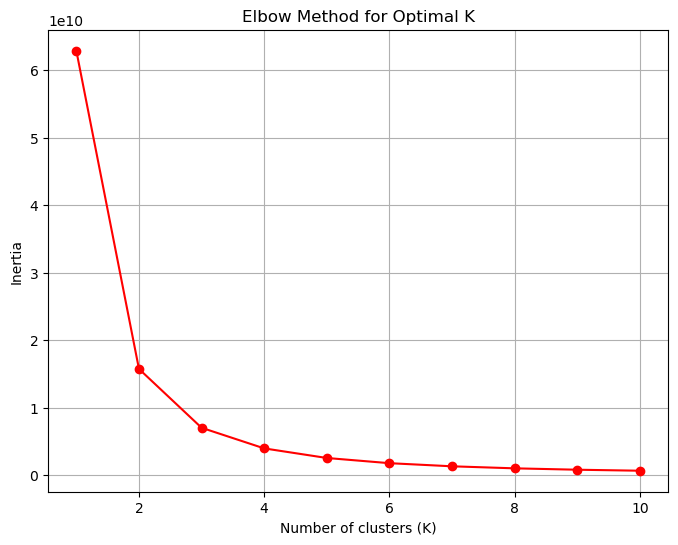

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='r')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [23]:
#part3

In [24]:
data = pd.read_csv("credit_card.csv")
data['CUST_ID'] = data['CUST_ID'].str.replace('C1', '', regex=False)
data['CUST_ID'] = data['CUST_ID'].astype(int)

In [25]:
mean1 = data['CREDIT_LIMIT'].mean()
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(mean1)

In [26]:
mean2 = data['MINIMUM_PAYMENTS'].mean()
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(mean2)

In [27]:
data2 = data.drop('CUST_ID', axis=1)

In [28]:
indexcol = data['CUST_ID'].to_numpy()  

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data2 = scaler.fit_transform(data2)
data2

array([[-0.73, -0.25, -0.42, ..., -0.31, -0.53,  0.36],
       [ 0.79,  0.13, -0.47, ...,  0.09,  0.23,  0.36],
       [ 0.45,  0.52, -0.11, ..., -0.1 , -0.53,  0.36],
       ...,
       [-0.74, -0.19, -0.4 , ..., -0.34,  0.33, -4.12],
       [-0.75, -0.19, -0.47, ..., -0.35,  0.33, -4.12],
       [-0.57, -0.89,  0.04, ..., -0.33, -0.53, -4.12]])

In [30]:
 data_final = np.column_stack((indexcol, data2))

In [31]:
inertia = []
k_max=1;

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    if( k>1 and kmeans.inertia_ < max(inertia)):
        k_max=k
    inertia.append(kmeans.inertia_)

k_max

10

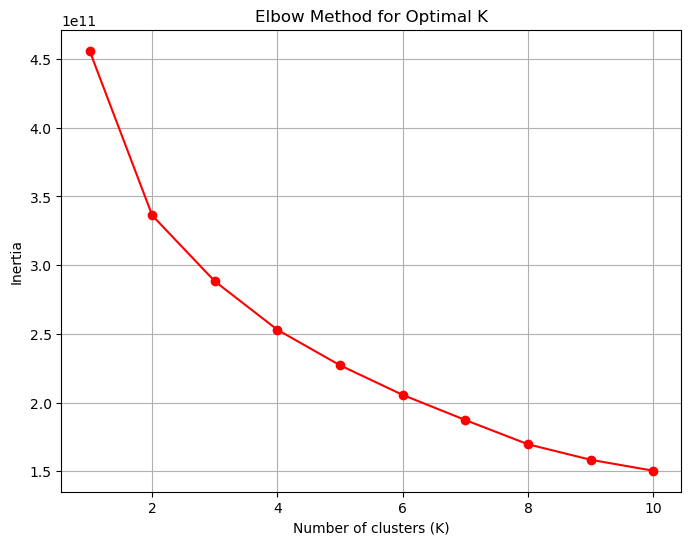

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='r')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [33]:
kmeans = KMeans(n_clusters=10, random_state=0)

kmeans.fit(data)

data['Cluster'] = kmeans.labels_

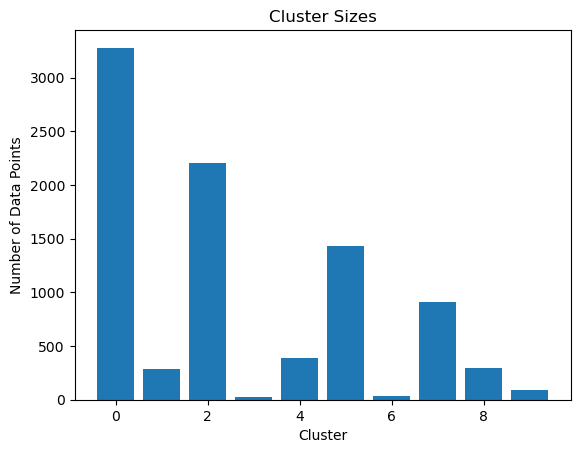

In [34]:
cluster_sizes = data['Cluster'].value_counts()
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Sizes')
plt.show()